# CarDekho Price Prediction

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/Cardekho.csv')

In [4]:
# Get the first 10 rows
df.head(10)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
9,12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [5]:
# Get the last 10 rows
df.tail(10)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15401,19531,Maruti Swift,Maruti,Swift,3,25000,Individual,Petrol,Automatic,22.00,1197,81.80,5,590000
15402,19533,Honda Amaze,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5,525000
15403,19534,Renault KWID,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5,395000
15404,19535,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000
15405,19536,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [6]:
# Get rows x columns
df.shape

(15411, 14)

In [7]:
# Get information about the data and it's types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


By closely observing the dataset we find that there's a wanted column `Unnamed: 0`. It seems to be an index but we can delete it for keeping the data clean.

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
# Get statistical summary of the numeric data
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


As we can see here that in the `seats` column the min. is 0 which is practically immpossible so we need to take a closer look.

In [11]:
zero_seats = df[df['seats'] == 0]
zero_seats

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


Upon inspecting we find `Honda City` and `Nissan Kicks` have 0 seats. Let's find the seat number in the dataset if there are any else replace values from online search.

In [12]:
honda_df = df[df['car_name'] == 'Honda City']
honda_df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
23,Honda City,Honda,City,6,50000,Individual,Petrol,Manual,17.4,1497,117.3,5,750000
27,Honda City,Honda,City,14,77253,Dealer,Petrol,Manual,17.7,1497,78.0,5,145000
37,Honda City,Honda,City,6,31180,Dealer,Petrol,Automatic,18.0,1497,117.3,5,700000
67,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.8,1497,116.3,5,545000
79,Honda City,Honda,City,7,69000,Dealer,Diesel,Manual,25.1,1498,98.6,5,550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15325,Honda City,Honda,City,7,220000,Dealer,Diesel,Manual,26.0,1498,98.6,5,550000
15330,Honda City,Honda,City,7,110000,Individual,Diesel,Manual,26.0,1498,98.6,5,490000
15369,Honda City,Honda,City,9,54311,Dealer,Petrol,Manual,16.8,1497,116.3,5,465000
15385,Honda City,Honda,City,10,28147,Dealer,Petrol,Manual,17.0,1497,118.0,5,500000


In [13]:
nissan_df = df[df['car_name'] == 'Nissan Kicks']
nissan_df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1259,Nissan Kicks,Nissan,Kicks,1,15000,Individual,Petrol,Manual,14.23,1330,153.87,5,1000000
2485,Nissan Kicks,Nissan,Kicks,1,7500,Individual,Diesel,Manual,20.45,1461,108.50,5,850000
3111,Nissan Kicks,Nissan,Kicks,2,4000,Dealer,Petrol,Manual,14.23,1498,104.55,5,890000
4937,Nissan Kicks,Nissan,Kicks,2,40000,Individual,Diesel,Manual,19.39,1461,108.00,5,1200000
9645,Nissan Kicks,Nissan,Kicks,2,11687,Trustmark Dealer,Petrol,Manual,14.23,1498,104.55,5,880000
12619,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000
13160,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Petrol,Manual,14.23,1498,104.55,5,950000
14275,Nissan Kicks,Nissan,Kicks,2,6200,Individual,Diesel,Manual,19.39,1461,108.00,5,1450000


We can conclude that both are 5 seater according to this dataset so let's replace values from 0 to 5

In [14]:
df.replace({"car_name": "Honda City", "seats": 0}, {"seats": 5}, inplace=True)
df.replace({"car_name": "Nissan Kicks", "seats": 0}, {"seats": 5}, inplace=True)

Let's verify once again by apply `describe` method

In [15]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.326131,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.805355,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Now we can see that min for `seats` column is 2

# Exploratory Data Analysis

## Univariate Analysis
It involves the plotting the distribution of induvisual numerical figures to find any outliers or anamoly.

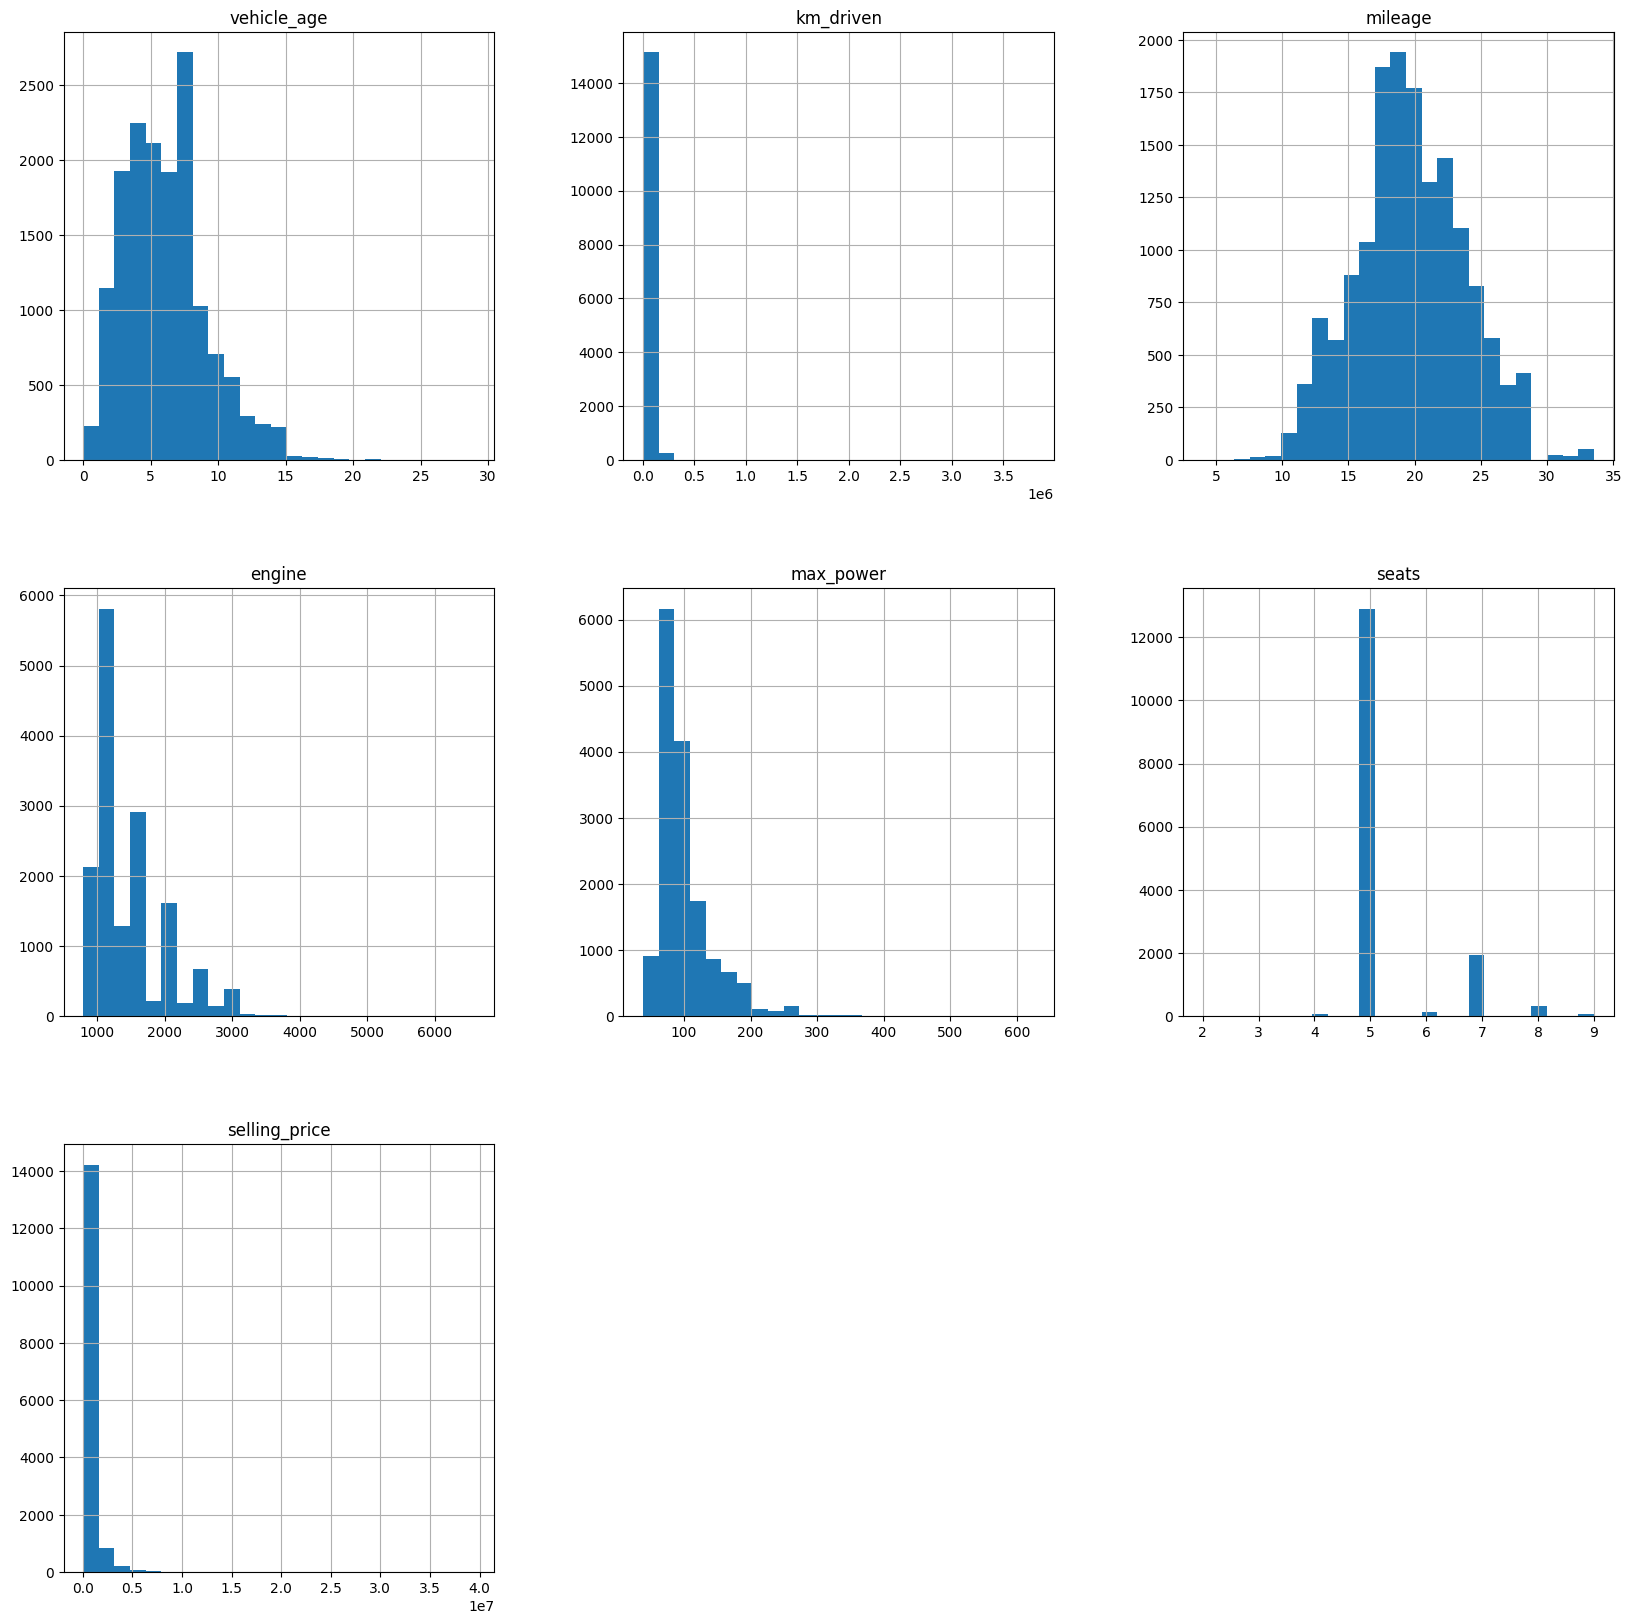

In [16]:
df.hist(figsize=(20, 20), bins=25)
plt.show()

Here are the findings for each graphs of the numeric data:

`Vehicle Age`: Most cars are between 1-7 years old, with a right-skewed distribution.  
`Kilometers Driven`: Majority of cars have low mileage, but some outliers have very high usage.  
`Mileage`: Mileage follows a roughly normal distribution, peaking around 18-22 km/l.  
`Engine Capacity`: Most cars have engine sizes around 1000-2000 cc, with a few high-performance outliers.  
`Max Power`: Skewed distribution, with most cars having power under 150 HP.  
`Seats`: The majority of cars have 5 seats, with some having 4, 6, or 7 seats.  
`Selling Price`: Selling price is highly right-skewed, indicating a few very high-priced cars.  

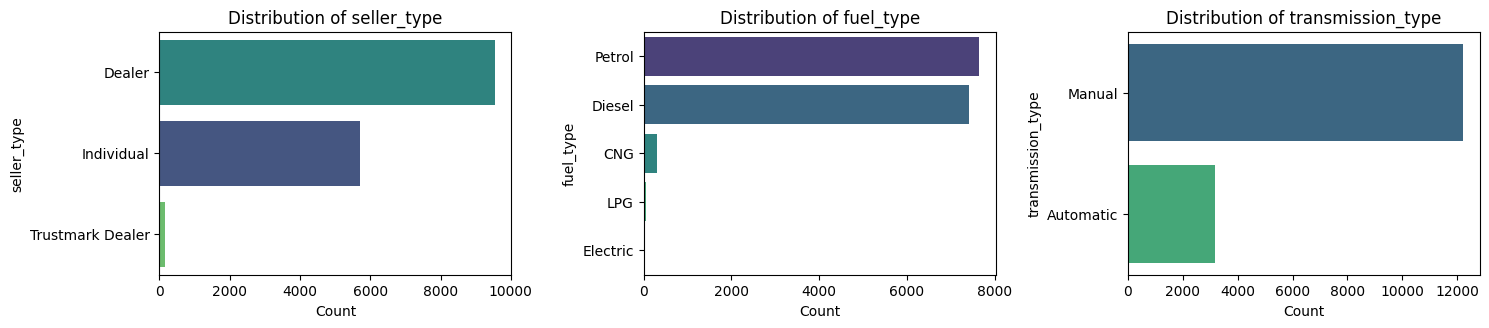

In [17]:
categorical_cols = ['seller_type', 'fuel_type', 'transmission_type']

plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis", hue=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Bivariate analysis

Involves examining relationship between two variables. Here in this case between `selling_price` and other factors. This helps to find how different factors affect price of a vehicle.

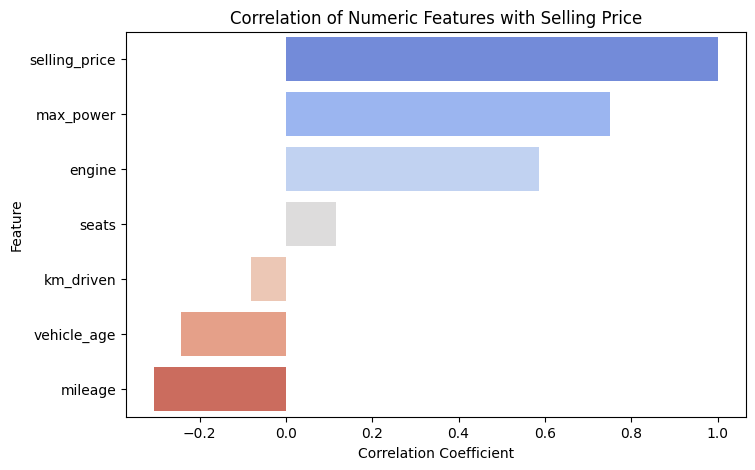

In [18]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr_with_selling_price = numeric_cols.corr()["selling_price"].sort_values(
    ascending=False
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=corr_with_selling_price.values,
    y=corr_with_selling_price.index,
    palette="coolwarm",
    hue=corr_with_selling_price.index,
)
plt.title("Correlation of Numeric Features with Selling Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

Higher `max_power` and `engine capacity` positively impact the selling price, while `mileage` and `vehicle age` show a negative correlation, indicating that older and high-mileage cars tend to be cheaper.

Also, according to this dataset `seats` and `km_driven` have less impact on `selling_price`, it's better to drop them.

In [19]:
df.drop(columns=['seats', 'km_driven'], inplace=True)
df.head()

,car_name,brand,model,vehicle_age,seller_type,fuel_type,transmission_type,mileage,engine,max_power,selling_price
0,Maruti Alto,Maruti,Alto,9,Individual,Petrol,Manual,19.70,796,46.30,120000
1,Hyundai Grand,Hyundai,Grand,5,Individual,Petrol,Manual,18.90,1197,82.00,550000
2,Hyundai i20,Hyundai,i20,11,Individual,Petrol,Manual,17.00,1197,80.00,215000
3,Maruti Alto,Maruti,Alto,9,Individual,Petrol,Manual,20.92,998,67.10,226000
4,Ford Ecosport,Ford,Ecosport,6,Dealer,Diesel,Manual,22.77,1498,98.59,570000


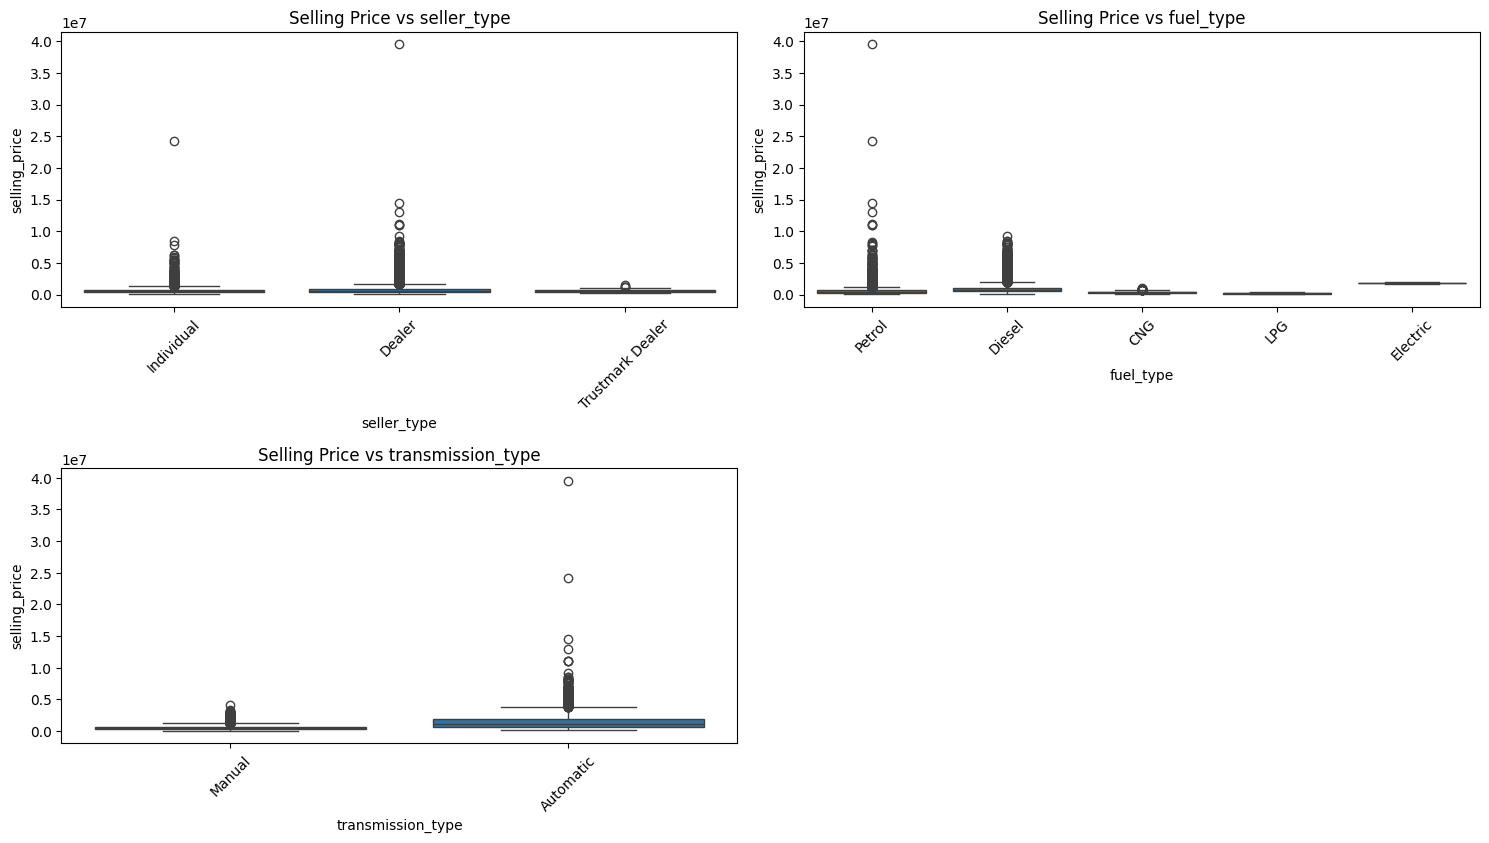

In [20]:
categorical_cols = ['seller_type', 'fuel_type', 'transmission_type']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], y=df['selling_price'])
    plt.xticks(rotation=45)
    plt.title(f"Selling Price vs {col}")

plt.tight_layout()
plt.show()

`Seller Type`: Dealers tend to have a wider range of selling prices, with some high-value outliers.  
`Fuel Type`: Diesel and Petrol cars show the most variability, while CNG, LPG, and Electric vehicles have lower selling prices.  
`Transmission Type`: Automatic cars generally have higher prices, whereas manual cars dominate the lower price range.  


# Data Preprocessing

After EDA we need to perform the following:
1. Remove irrelevant columns
2. Encode categorical data
3. Split the data for training and testing

In [21]:
clean_df = df.copy()
clean_df.head()

,car_name,brand,model,vehicle_age,seller_type,fuel_type,transmission_type,mileage,engine,max_power,selling_price
0,Maruti Alto,Maruti,Alto,9,Individual,Petrol,Manual,19.70,796,46.30,120000
1,Hyundai Grand,Hyundai,Grand,5,Individual,Petrol,Manual,18.90,1197,82.00,550000
2,Hyundai i20,Hyundai,i20,11,Individual,Petrol,Manual,17.00,1197,80.00,215000
3,Maruti Alto,Maruti,Alto,9,Individual,Petrol,Manual,20.92,998,67.10,226000
4,Ford Ecosport,Ford,Ecosport,6,Dealer,Diesel,Manual,22.77,1498,98.59,570000


In [22]:
clean_df.drop(columns=['car_name', 'brand', 'model'], inplace=True)
clean_df.to_csv('./data/cleaned_cardekho.csv', index=False, encoding='utf-8')
clean_df.head()

,vehicle_age,seller_type,fuel_type,transmission_type,mileage,engine,max_power,selling_price
0,9,Individual,Petrol,Manual,19.70,796,46.30,120000
1,5,Individual,Petrol,Manual,18.90,1197,82.00,550000
2,11,Individual,Petrol,Manual,17.00,1197,80.00,215000
3,9,Individual,Petrol,Manual,20.92,998,67.10,226000
4,6,Dealer,Diesel,Manual,22.77,1498,98.59,570000


In [23]:
clean_df = pd.get_dummies(clean_df, dtype=float)
clean_df.head()

,vehicle_age,mileage,engine,max_power,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,19.70,796,46.30,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,18.90,1197,82.00,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,17.00,1197,80.00,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,20.92,998,67.10,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,22.77,1498,98.59,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Building the regression model

Linear regression models the relationship between selling price and features by fitting a linear equation to minimize error. It predicts prices based on learned coefficients, assuming a linear relationship between variables.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Split the dataset in ratio 80:20. 80% trains the model whereas 20% is used to test the predicted prices.

In [27]:
X = clean_df.drop(columns=['selling_price'])
Y = clean_df['selling_price']

X.shape, Y.shape

((15411, 14), (15411,))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12328, 14), (3083, 14), (12328,), (3083,))

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

# Evaluation Metrics

- **R-squared:** How much of the variance in the target variable is explained by the model.
- **Mean Absolute Error:** The average absolute difference between predicted and actual values.
- **Mean Squared Error:** The average squared difference between predicted and actual values.
- **Root Mean Squared Error:** The square root of the MSE, giving a more interpretable scale.

In [30]:
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5

print(f'R² Score: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R² Score: 0.6699
MAE: 278354.96
MSE: 248461571685.40
RMSE: 498459.20


- **R² Score: 0.6699**  
  The model explains approximately **67% of the variance** in selling prices, indicating a moderate fit. However, some factors influencing price are still unaccounted for.  

- **Mean Absolute Error (MAE): 278,354.96**  
  On average, the model’s predictions deviate from actual prices by **₹2.78 lakhs**.  

- **Mean Squared Error (MSE): 248,461,571,685.40**  
  The high MSE suggests that large errors contribute significantly, indicating the presence of **outliers or high variance** in the data.  

- **Root Mean Squared Error (RMSE): 498,459.20**  
  The typical prediction error is around **₹4.98 lakhs**, which is relatively high and suggests potential room for model improvement. 

# Plotting the best fit line

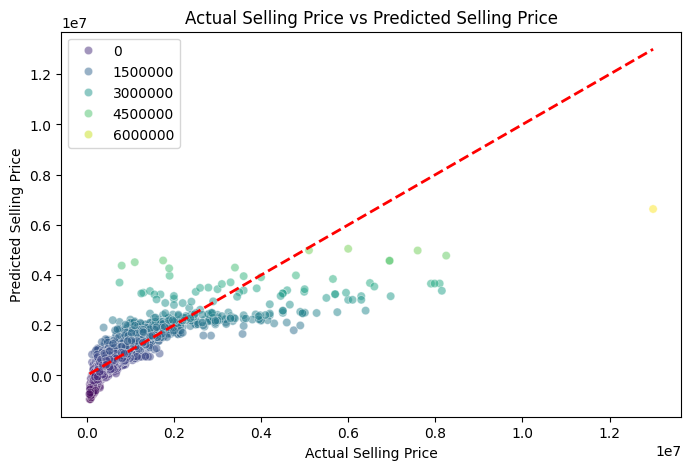

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_test, y=Y_pred,alpha=0.5 ,palette='viridis', hue=Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2) 
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Price vs Predicted Selling Price")
plt.show()

Plotting the distribution plot for Predicted Prices and Actual Prices

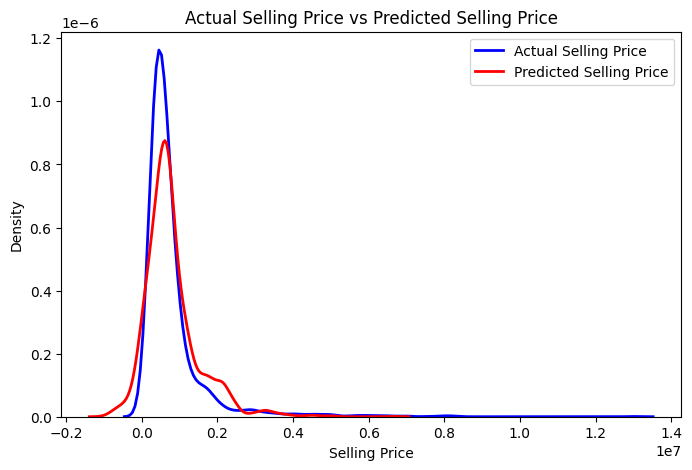

In [32]:
plt.figure(figsize=(8, 5))
sns.kdeplot(Y_test, label='Actual Selling Price', color='blue', linewidth=2)
sns.kdeplot(Y_pred, label='Predicted Selling Price', color='red', linewidth=2)
plt.xlabel("Selling Price")
plt.ylabel("Density")
plt.title("Actual Selling Price vs Predicted Selling Price")
plt.legend()
plt.show()

### **Actual vs. Predicted Selling Price Distribution**
- The **blue curve** represents the actual selling price distribution, while the **red curve** shows the predicted values.
- The two distributions are closely aligned, indicating that the model's predictions generally follow the actual trend.
- Some deviations suggest **overestimation or underestimation** in certain price ranges, which could be improved with feature engineering or a more complex model.
